In [81]:
library(FactoMineR)
library(dummies)
library(factoextra)

In [108]:
example1 <- read.csv('chunked-feature-sets/top-1silhouettes-on-diverse-wo.csv')

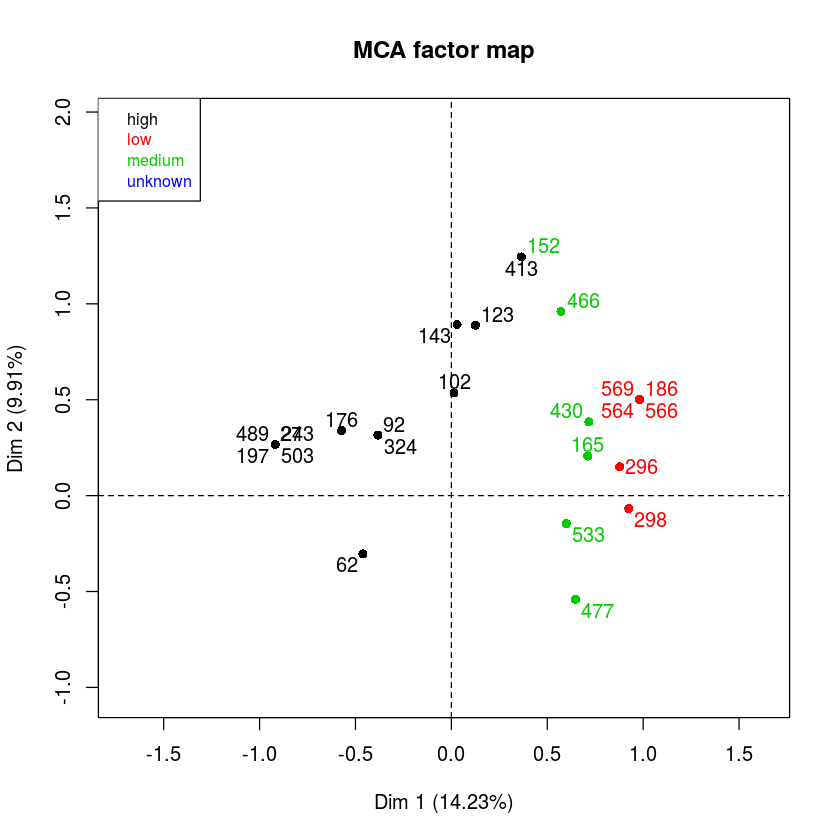

In [110]:
knownratios = which(example1$verb.noun.ratio != 'unknown')
mca <- MCA(example1,quali.sup=1:12,graph=FALSE)
plot(mca,choix="ind",habillage="verb.noun.ratio",invisible=c("var","quali.sup"),select=knownratios,unselect=1)

## Now PCA

In [113]:
dex1 <- example1[,1:12]
for(f in c('X82A' , 'X83A', 'X85A', 'X86A', 'X87A', 'X88A', 'X89A', 'X93A')) {
   dex1 <- cbind(dex1,dummy(as.factor(example1[[f]])))
}

In [114]:
pca <- princomp(dex1[,13:42])
ind <- get_pca_ind(pca)

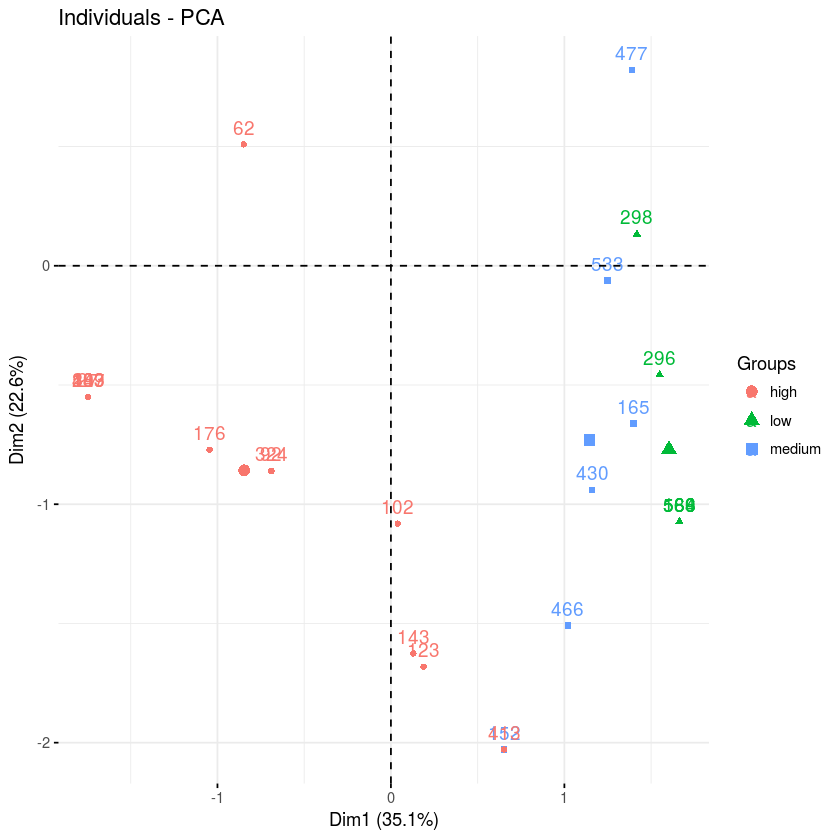

In [115]:
fviz_pca_ind(pca, habillage = as.factor(dex1$verb.noun.ratio),select.ind=list(name=knownratios))

In [118]:
var <- get_pca_var(pca)
summary(var)
head(var$contrib)

        Length Class  Mode   
coord   900    -none- numeric
cor     900    -none- numeric
cos2    900    -none- numeric
contrib 900    -none- numeric

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10,⋯,Dim.21,Dim.22,Dim.23,Dim.24,Dim.25,Dim.26,Dim.27,Dim.28,Dim.29,Dim.30
NA1 SV,1.94706574,5.723609691,5.2283524,8.736189128,1.46534725,12.909971795,15.448862737,0.02830318,0.16073492,1.8202401,⋯,0.0002827582,0.0022879086,1.443567e-05,0.4916941,2.241399,25.985217,4.406981042,NaN,NaN,NaN
NA2 VS,1.60383165,2.943595892,2.3596249,9.244271578,0.45248546,12.641773667,16.226052805,2.89771941,2.44128570,0.6523636,⋯,0.0007778258,0.0001565166,1.307394e-04,0.4916941,2.241399,25.985217,4.406981042,NaN,NaN,NaN
NA3 No dominant order,0.01662764,0.457943990,0.5631782,0.007179998,0.28927712,0.001407579,0.009536179,3.49878666,3.85485717,4.6520150,⋯,0.0001226360,0.0012476033,5.828866e-05,0.4916941,2.241399,25.985217,4.406981042,NaN,NaN,NaN
NA1 OV,11.79299432,1.346714118,0.5596473,13.477485704,2.31108048,0.032142390,4.900125184,0.44656181,5.92648638,0.2829945,⋯,0.0285994598,0.0009423904,5.728738e-04,24.9494976,5.630324,2.001999,0.001646489,NaN,NaN,NaN
NA2 VO,12.74112650,1.125393668,1.2423698,12.508989601,1.54041806,0.075639546,3.666402480,5.47794151,0.05297441,0.2070097,⋯,0.0166702974,0.0003094733,7.253250e-06,24.9494976,5.630324,2.001999,0.001646489,NaN,NaN,NaN
NA3 No dominant order.1,0.01832734,0.009927012,0.1343374,0.018053827,0.07789013,0.009166810,0.089303796,9.05259505,4.85883215,0.9740810,⋯,0.0016000194,0.0001717810,7.090487e-04,24.9494976,5.630324,2.001999,0.001646489,NaN,NaN,NaN


In [119]:
pca$loadings


Loadings:
                                            Comp.1 Comp.2 Comp.3 Comp.4 Comp.5
NA1 SV                                      -0.140  0.239 -0.229 -0.296  0.121
NA2 VS                                       0.127 -0.172  0.154  0.304       
NA3 No dominant order                                                         
NA1 OV                                      -0.343  0.116         0.367  0.152
NA2 VO                                       0.357 -0.106 -0.111 -0.354 -0.124
NA3 No dominant order.1                                                       
NA1 Postpositions                           -0.356         0.195  0.154  0.164
NA2 Prepositions                             0.364        -0.168              
NA3 Inpositions                                                               
NA4 No dominant order                                            -0.117       
NA5 No adpositions                                                            
NA1 Genitive-Noun                        

In [121]:
pca$loadings[1:10,'Comp.1']

NA1 SV                  NA2 VS   NA3 No dominant order 
          -0.1395372975            0.1266424752            0.0128948223 
                 NA1 OV                  NA2 VO NA3 No dominant order.1 
          -0.3434092939            0.3569471459           -0.0135378520 
      NA1 Postpositions        NA2 Prepositions         NA3 Inpositions 
          -0.3561251044            0.3636529844           -0.0009787872 
  NA4 No dominant order 
           0.0006309399